In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
implied_adj = pd.read_clipboard()

implied_adj.tail()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
99,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,-0.004056,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.006062,0.011011,0.000000,0.006281,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.000000,0.000000,0.000000,0.008234,0.0,0.0,0.0,0.0,0.002296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.000000,0.000000,-0.001825,0.012289,0.0,0.0,0.0,0.0,-0.001456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

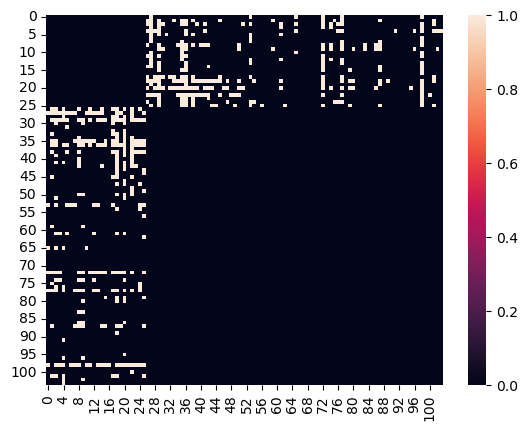

In [5]:
sns.heatmap(np.where(implied_adj > 0, 1, 0))

In [25]:
full_implied_adj = pd.read_clipboard()

full_implied_adj.tail()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

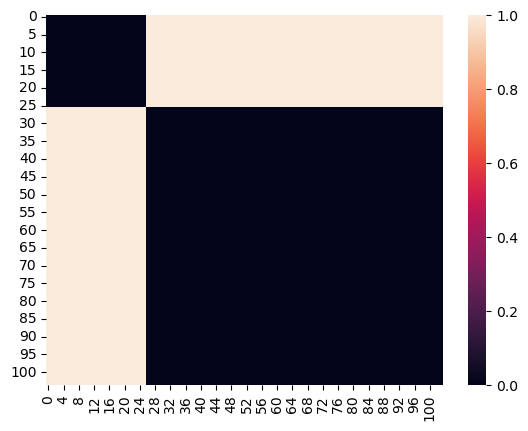

In [26]:
sns.heatmap(np.where(full_implied_adj > 0, 1, 0))

In [27]:
teste = pd.read_clipboard()

teste.tail()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<AxesSubplot: >

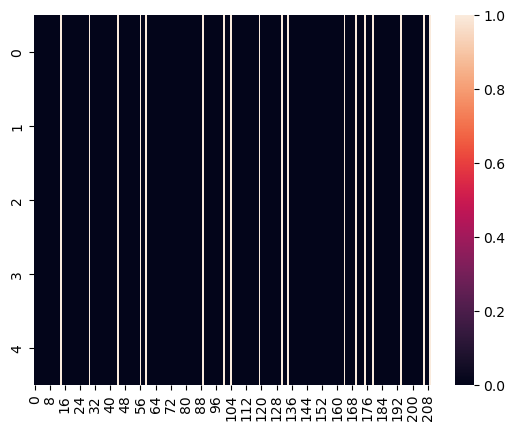

In [29]:
sns.heatmap(np.where(teste > 0, 1, 0))

In [7]:
adj = pd.read_clipboard()
adj = adj.reset_index(drop=True)

adj.tail()

,index,variable,value
797,103,3,1
798,103,4,1
799,103,9,1
800,103,17,1
801,103,21,1


In [12]:
expanded_implied_matrix = adj.pivot_table(index=["index"], columns=["variable"], values=["value"]).fillna(0)

<AxesSubplot: xlabel='None-variable', ylabel='index'>

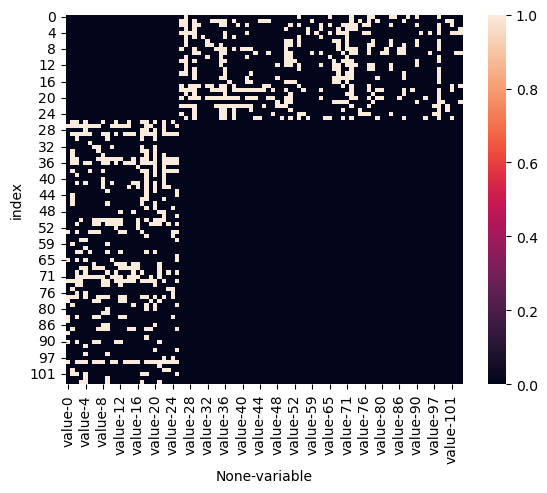

In [13]:
sns.heatmap(expanded_implied_matrix)

In [32]:
new_adj = adj.copy()
for i, row in adj.iterrows():
    row_to_add = pd.DataFrame([{"index": row["variable"], "variable": str(row["index"]), "value": 1}])
    new_adj = pd.concat([new_adj, row_to_add], axis=0)

In [33]:
new_adj

,index,variable,value
0,1,26,1
1,2,26,1
2,4,26,1
3,8,26,1
4,11,26,1
...,...,...,...
0,103,3,1
0,103,4,1
0,103,9,1
0,103,17,1


In [36]:
import torch
from torch_geometric.utils import to_dense_adj
import numpy as np

row = torch.from_numpy(new_adj["index"].to_numpy().astype(np.int64)).to(torch.long)
col = torch.from_numpy(new_adj["variable"].to_numpy().astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

In [44]:
new_expanded_implied_matrix = pd.DataFrame(to_dense_adj(edge_index)[0])

<AxesSubplot: >

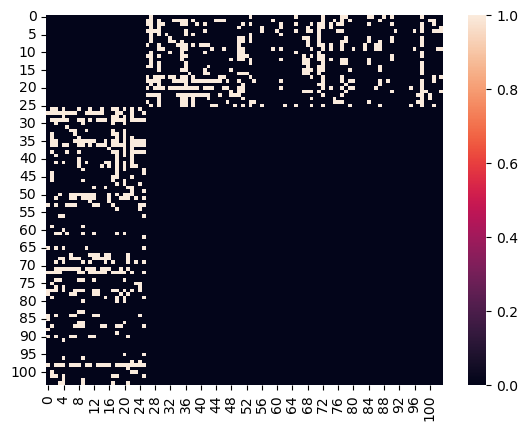

In [45]:
sns.heatmap(new_expanded_implied_matrix)